# Multiple linear regression fitting

## Relevant imports



Begin by importing the relevant packages and data.

In [1]:
# Import packages
import pandas as pd
import seaborn as sns

In [2]:
# Load dataset
penguins = pd.read_csv("penguins.csv")

# Examine first 5 rows of dataset
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


**Note:** Recall that the default for `head()` is to show the first 5 rows. If you change the value for `n`, you can show more rows. For example, the command `penguins.head(3)` will show 3 rows.

From the first 5 rows of the dataset, we can see that there are several columns available: `species`, `island`, `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`, and `sex`. There also appears to be some missing data.

In [3]:
# Subset data
penguins = penguins[["body_mass_g", "bill_length_mm", "sex", "species"]]

# Rename columns
penguins.columns = ["body_mass_g", "bill_length_mm", "gender", "species"]

# Drop rows with missing values
penguins.dropna(inplace=True)

# Reset index
penguins.reset_index(inplace=True, drop=True)

You can review the documentation for [`dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) and [`reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html). In short, the `dropna()` function by default removes any rows with any missing values in any of the columns. The `reset_index()` function resets the index values for the rows in the dataframe. Typically, you use `reset_index()` after you've finished manipulating the dataset. By setting `inplace=True`, you will not create a new DataFrame object. By setting `drop=True`, you will not insert a new index column into the DataFrame object.

In [4]:
# Examine first 5 rows of data
penguins.head()

,body_mass_g,bill_length_mm,gender,species
0,3750.0,39.1,male,Adelie
1,3800.0,39.5,female,Adelie
2,3250.0,40.3,female,Adelie
3,3450.0,36.7,female,Adelie
4,3650.0,39.3,male,Adelie


## Create holdout sample

Earlier, you learned about creating a holdout sample to better test and evaluate the results of your regression model. In order to do this more easily in Python, you must subset your x and y variables, import the `train_test_split` function from `sci-kit learn`, and then use the function. Please review the course content on holdout samples as needed before proceeding through the rest of the notebook.

In [5]:
# Subset X and y variables
penguins_X = penguins[["bill_length_mm", "gender", "species"]]
penguins_y = penguins[["body_mass_g"]]

In [6]:
# Import train-test-split function from sci-kit learn
from sklearn.model_selection import train_test_split

In [7]:
# Create training data sets and holdout (testing) data sets
X_train, X_test, y_train, y_test = train_test_split(penguins_X, penguins_y, 
                                                    test_size = 0.3, random_state = 42)

**Note:** We have set the `test_size` variable to `0.3`, which tells the function what proportion of the data should be in the holdout sample. Additionally, we have set the `random_state` variable equal to `42` for reproducibility. If you change the `random_state`, your holdout sample and training data sets will be different, so your model may perform differently.

## Model construction

Recall that we have explored the penguin dataset before. Earlier, we used scatterplots to perform exploratory data anlysis, and we identified linear relationships between the following variables:

* bill length (mm) and flipper length (mm)
* bill length (mm) and body mass (g)
* flipper length (mm) and body mass (g)

In this part of the course, we'll focus on understanding some of the variables' relationships with body mass (g). We'll use one continuous X variable, bill length (mm), and the two categorical variables, gender and species.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols()` function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.

In [8]:
# Write out OLS formula as a string
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

In [9]:
# Import ols() function from statsmodels package
from statsmodels.formula.api import ols

After we've imported the `ols()` function, we can save the `ols_data` as a dataframe, create the `ols` object, fit the model, and generate summary statistics. At this point, it would make sense to double check the model assumptions about errors (homoscedasticity and normality of residuals). Please review other resources in the program as needed.

In [10]:
# Create OLS dataframe
ols_data = pd.concat([X_train, y_train], axis = 1)

# Create OLS object and fit the model
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

## Model evaluation and interpretation

Use the `.summary()` function to get a summary table of model results and statistics.

Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We'll focus on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

In [11]:
# Get model results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.31e-92
Time:                        20:11:17   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2032.2111    354.087      5.739      0.000    1334.510    2729.913
C(gender)[T.male]         528.9508     55.105      9.599      0.000     420.371     637.531
C(species)[T.Chinstrap]  -285.3865    106.339     -2.684      0.008    -494.920     -75.853
C(species)[T.Gentoo]     1081.6246     94.953     11.391      0.000     894.526    1268.723
bill_length_mm             35.5505      9.493      3.745      0.000      16.845      54.256
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.436
Skew:                           0.084   Prob(JB):                        0.804
Kurtosis:                       2.871   Cond. No.                         798.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can then interpret each of the beta coefficients for each X variable.

### C(gender) - Male
Given the name of the variable, we know that the variable was encoded as `Male = 1`, `Female = 0`. This means that female penguins are the reference point. If all other variables are constant, then we would expect a male penguin's body mass to be about 528.95 grams more than a female penguin's body mass.

### C(species) - Chinstrap and Gentoo
Given the names of these two variables, we know that Adelie penguins are the reference point. So, if we compare an Adelie penguin and a Chinstrap penguin, who have the same characteristics except their species, we would expect the Chinstrap penguin to have a body mass of about 285.39 grams less than the Adelie penguin. If we compare an Adelie penguin and a Gentoo penguin, who have the same characteristics except their species, we would expect the Gentoo penguin to have a body mass of about 1,081.62 grams more than the Adelie penguin.

### Bill length (mm)
Lastly, bill length (mm) is a continuous variable, so if we compare two penguins who have the same characteristics, except one penguin's bill is 1 millimeter longer, we would expect the penguin with the longer bill to have 35.55 grams more body mass than the penguin with the shorter bill.

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     322.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.31e-92
Time:                        20:13:12   Log-Likelihood:                -1671.7
No. Observations:                 233   AIC:                             3353.
Df Residuals:                     228   BIC:                             3371.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2

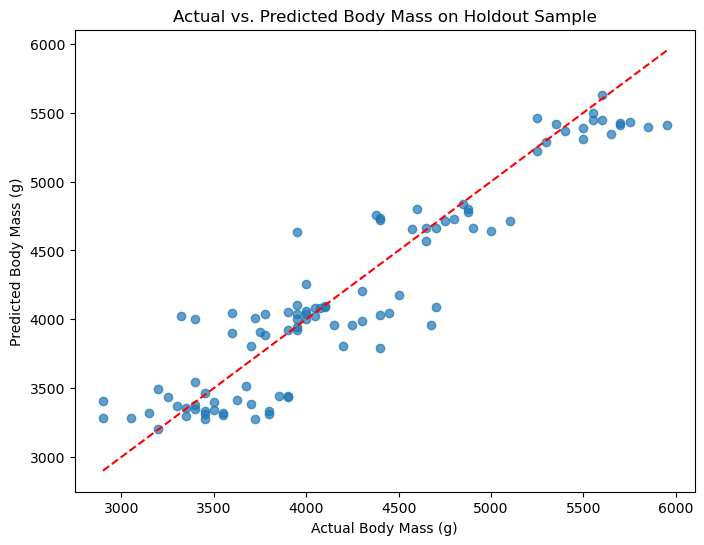

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assume penguins_X and penguins_y have been defined and cleaned as in your code.

# Create training and holdout (testing) datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(penguins_X, penguins_y, 
                                                    test_size=0.3, random_state=42)

# Write out OLS formula as a string
ols_formula = "body_mass_g ~ bill_length_mm + C(gender) + C(species)"

# Create OLS dataframe for training data and fit the model
ols_data_train = pd.concat([X_train, y_train], axis=1)
model = ols(formula=ols_formula, data=ols_data_train).fit()
print(model.summary())

# Validate the holdout sample
# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate testing performance
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\n=== Testing (Holdout) Performance ===")
print(f"MSE:  {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R^2:  {test_r2:.2f}")
# Evaluate training performance

y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

print("\n=== Training Performance ===")
print(f"MSE:  {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R^2:  {train_r2:.2f}")


# Optionally, plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Body Mass (g)")
plt.ylabel("Predicted Body Mass (g)")
plt.title("Actual vs. Predicted Body Mass on Holdout Sample")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
